<a href='#1'> Изучение данных и подготовка к анализу </a>

<a href='#2'> Предобработка данных</a>

<a href='#3'> Исследовательский анализ данных</a>

<a href='#4'> Модель прогнозирования оттока клиентов</a>
   
   <a href='#4.1'> Логистическая регрессия </a>
   
   <a href='#4.2'> Случайный лес </a>
    
<a href='#5'>  Кластеризация клиентов </a>

<a href='#6'> Вывод</a>


# Прогнозирование поведения клиентов фитнес-центра

Задача: провести анализ на основе данных клиентских анкет и подготовить план действий по удержанию клиентов.

**Описание данных:**

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол (1- женщина, 0 - мужчина);
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<a id = '1'> </a>

## Изучение данных и подготовка к анализу

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* Пропусков в данных нет. 
* Гендерное соотношение равномерное, практически 1:1. 
* Среди клиентов преобладают проживающие или работающие в районе, где расположен фитнес-клуб. 
* Практически половина клиентов являются сотрудниками компании-партнёра клуба.
* Менее трети клиентов первоначально записались в рамках акции «приведи друга».
* У 90% клиентов указан телефон.
* В среднем длительность текущего действующего абонемента 4,68 ±4,5 месяца, таким образом преобладают клиенты с месячными и полугодовыми абонементами, что также вижно по первому (1) и третьему (6) квартилям.
* Более трети клиентов посещают групповые занятия.
* В среднем возраст клиентов 29±3,2 года.
* Средняя суммарная выручка от дугих услуг фитнес центра 146,9.
* Средний период до конца текущего абонемента 4,3 мес.
* Средний лайфтайм 3,7 мес.
* Средняя частота посещений в первую и текущую неделю сопоставимы 1,87±0,97 и 1,76±1,05 соответсвенно, в целом на текущей неделе несколько меньше, за счет большей вариабельности данных (std 1.05 против 0.97), что проявляется смещением нижней границы в сторону меньших значений, по сравнению с нижней границей первой недели.
* Более четверти клиентов "ушли" в текущем месяце.

<a id = '2'> </a>

## Предобработка данных

In [4]:
gym.duplicated().sum()

0

Пропусков и дубликатов в данных нет. Приведем названия колонок к нижнему регистру.

In [5]:
gym.columns = gym.columns.str.lower()
gym.head() 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id = '3'> </a>

## Исследовательский анализ данных 

Посмотрим численность групп "ушедших" и оставшихся клиентов.

In [6]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Соотношение 1:2,7.

Посмотрим на средние значения признаков в группах "ушедших" и оставшихся клиентов.

In [7]:
gym.groupby('churn').mean()   

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Гендерное соотношение в обеих группах одинаковое, также группы не различаются по наличию телефона.
Во всех остальных признаках группа "ушедших" показывает более низкие результаты. Наиболее значимые различия по признакам:
* **длительность текущего действующего абонемента** (1.7 vs 5.7)
* **суммарная выручка от других услуг фитнес-центра** (115 vs 158)
* **срок до окончания текущего действующего абонемента** (1.6 vs 5.2)
* **время с момента первого обращения в фитнес-центр** (0.9 vs 4.7)
* **средняя частота посещений в неделю за предыдущий месяц**(1.0 vs 2.0). 
В целом "ушедшие" клиенты демонстрируют более низкую среднюю частоту посещений в неделю за все время с начала действия абонемента(1.47 vs 2.0), но средняя частота посещений в неделю за предыдущий месяц ниже в 2 раза.

Посмотрим распределение по разным признакам в группе "ушедших" и оставшихся клиентов. Для визуализации распределений числовых признаков построим гистограммы.

<Figure size 720x360 with 0 Axes>

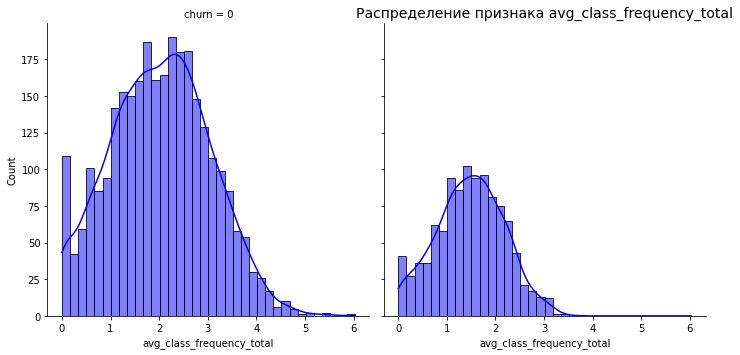

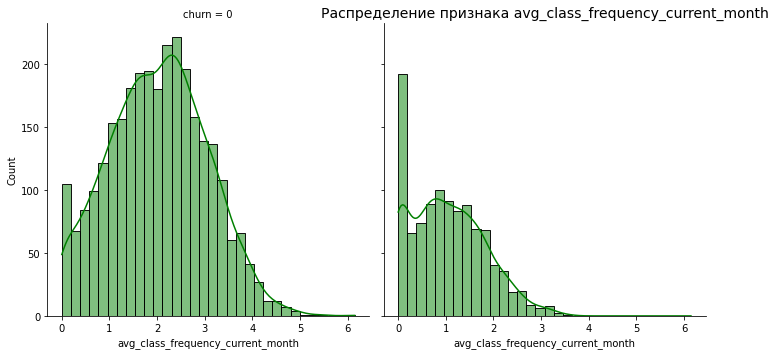

In [8]:
fig = plt.figure(figsize = (10,5))

sns.displot(x='avg_class_frequency_total',
            col='churn',
            kde=True,
            data=gym,
            color = 'blue')
plt.title('Распределение признака avg_class_frequency_total',fontsize=14);

sns.displot(x='avg_class_frequency_current_month',
            col='churn',
            kde=True,
            data=gym,
            color = 'green')
plt.title('Распределение признака avg_class_frequency_current_month',fontsize=14);
plt.show()   

* Видно,что форма распределения в обеих группах по avg_class_frequency_total одинаковая, разница лишь в количестве, что примерно соответсвует разнице между количеством клиентов в группах.
* Формы распределения по признаку avg_class_frequency_current_month значительно различаются, в группе "ушедших" клиентов график смещен в сторону меньших значений с большим пиком около 0, что является закономерным, перед тем как окончательно "уйти" клиенты сокращают количество своих визитов в клуб.

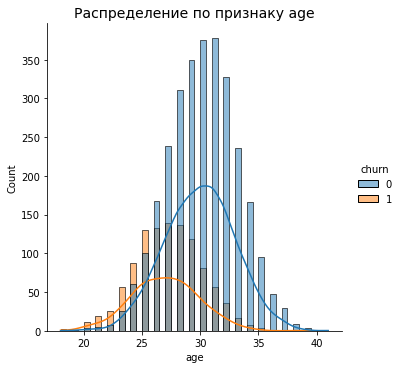

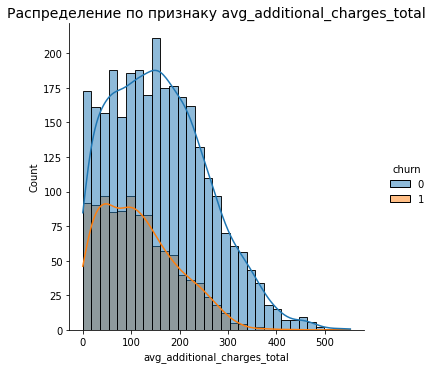

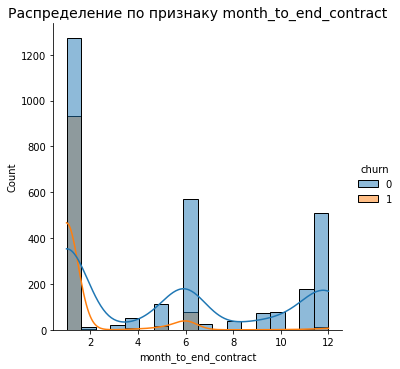

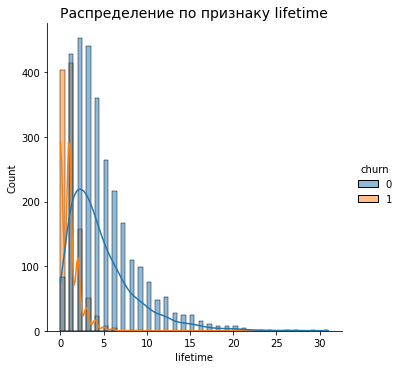

In [9]:
for col in gym[['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime']].columns:
    plot = sns.displot(x=gym[col],hue= gym['churn'],kde=True)
    plt.title('Распределение по признаку {}'.format(col),fontsize=14)
    plt.show()


* Распределения в группах по признаку возраста также сопоставимы по форме, распределение в группе ушедших клиентов несколько смещено в сторону меньших значений.
* Распределение по признаку avg_additional_charges_total одинаковой формы, различается лишь масштаб.
* Распределение по признаку month_to_end_contract у ушедших клиентов также смещено в сторону меньших значений, после 7 месяцев кривая совпадает с осью х, кроме того непропорционально большой пик, по сравнению с группой оставшихся пользователей, в области 1 месяца
* распределение по признаку лайфтайм смещено в сторону меньших значений после 6-7 месяцев сливается в осью х.

Распределение категориальных признаков отобразим с помощью violinplot и столбчатых диаграмм.

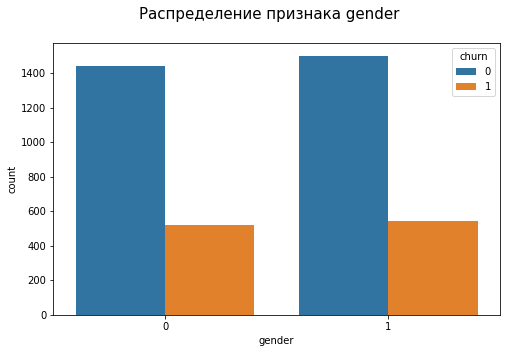

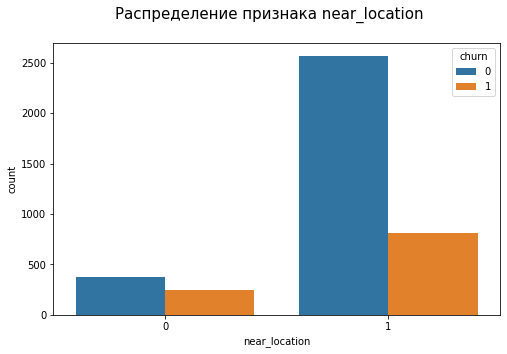

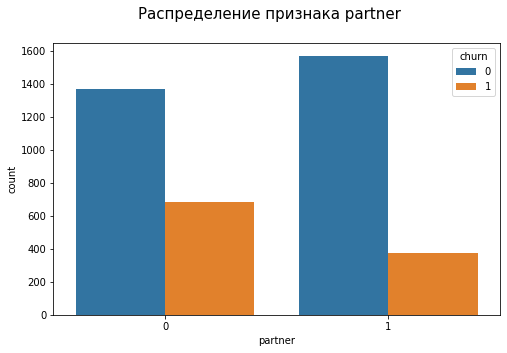

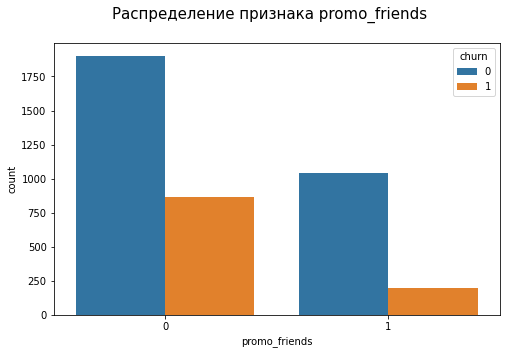

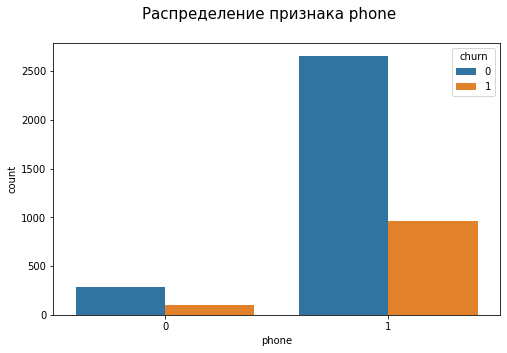

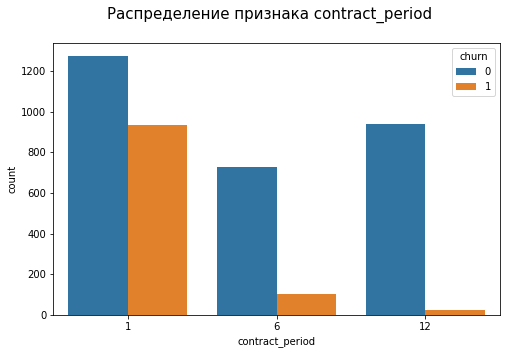

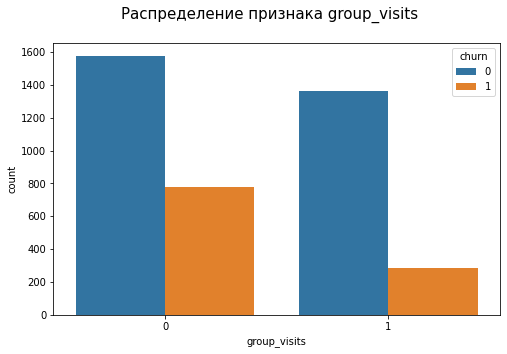

In [10]:
for col in gym[ ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']].columns:
    fig = plt.figure(figsize = (8,5))
    fig.suptitle('Распределение признака {}'.format(col),fontsize=15)
    sns.countplot(x=col, hue='churn', data=gym)
    plt.show()

* Распределение по признаку пола одинаково в обеих группах
* Большая часть  оставшихся пользователей живет или работает рядом с клубом, в группе ушедших пользователей эта доля ниже
* Большая часть оставшихся клиентов являются сотрудниками компании-партнера клуба, в группе ушедших клиентов преобладают клиенты, не являющиеся сотрудниками компании-партнера клуба
* Большая часть клиентов в обеих группах пришла не по программе promo_friends
* У большей части клиентов обеих групп указан номер телефона
* Распределения по признаку contract_period различаются. Несмотря на преодладание в обеих группах периода в 1 месяц, в группе ушедших клиентов  доля таких клиентов в общем соотношении значительно выше. Кроме того наблюдается снижение числа клиентов с увеличением количества месяцев абонемента, а в группе оставшихся пользователей число клиентов с абонементом в 12 месяцев превышает число клиентов с абонементом в 6 месяцев
* В обеих группах доля клиентов, не посещающих групповые занятия выше, причем в группе "ушедших" клиентов доля клиентов, посещающих групповые занятия меньше

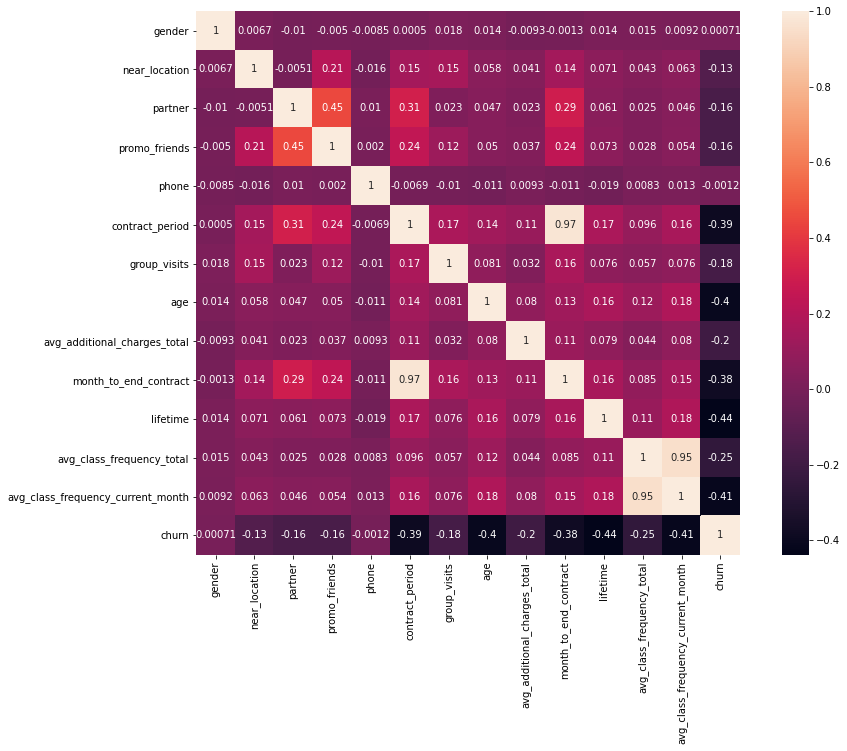

In [11]:
cm = gym.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True, square = True)
plt.show()

На матрице корреляции признаков сильно коррелирующих с целевым показателем churn не выявлено. Максимальные кореляции показывают время с момента первого обращения в фитнес-центр и средняя частота посещений в неделю за предыдущий месяц. Но на матрице есть сильно коррелирующие между собой признаки:

* **длительность текущего действующего абонемента** и **срок до окончания текущего действующего абонемента** (0.97)
* **средняя частота посещений в неделю за все время с начала действия абонемента** и **средняя частота посещений в неделю за предыдущий месяц** (0.95)

Учитывая высокую корреляцию двух пар признаков, перед обучением по одному из пары нужно будет удалить, для избежания ошибок вследствие мультиколлинеарности. Оставим признаки **длительность текущего действующего абонемента** и **средняя частота посещений в неделю за предыдущий месяц**.

In [12]:
gym = gym.drop(columns = ['month_to_end_contract', 'avg_class_frequency_total'], axis = 1)
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


<a id = '4'> </a>

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Для начала присвоим выборкам признаков и целевого значения имена x и у соответсвенно, а затем разобьем данные на обучающую и валидационную выборки в соотношении 80:20.

In [13]:
x = gym.drop(['churn'],axis = 1)
y = gym['churn']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

<a id = '4.1'> </a>

### Логистическая регрессия

Стандартизируем данные перед использованием регрессии.

In [14]:
scaler = StandardScaler() 
x_train_st =  scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train_st,y_train)
predictions = model.predict(x_test_st)

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.82


<a id = '4.2'> </a>

### Случайный лес

In [17]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(x_train_st,y_train)
rf_predictions = rf_model.predict(x_test_st)

In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,rf_predictions)))

Accuracy: 0.90
Precision: 0.81
Recall: 0.75


### Вывод

При сравнении двух моледей на основании оцениваемых метрик себя показала лучше логистическая регрессия, так при равной доле правильных ответов, модель показывает сопоставимую точность и большую, чем у другой модели полноту.


<a id = '5'> </a>

## Кластеризация клиентов

Построим дендрограмму на основе данных для выбора оптимального числа кластеров.

In [19]:
x_st =  scaler.fit_transform(x)

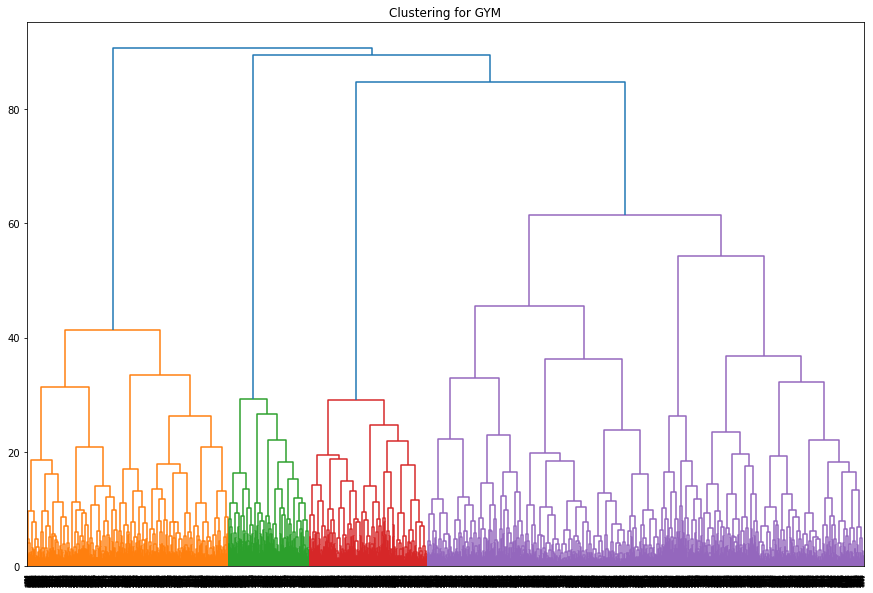

In [20]:
linked = linkage(x_st, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Сlustering for GYM')
plt.show() 

Разделим клиентов на 5 кластеров. Проведем кластеризацию с помощью KMeans.

In [21]:
km = KMeans(n_clusters=5, random_state=0) 
labels = km.fit_predict(x_st) 
gym['cluster'] = labels
gym[['churn','cluster']].head(10)

,churn,cluster
0,0,4
1,0,3
2,0,2
3,0,0
4,0,0
5,0,3
6,0,4
7,1,2
8,0,0
9,0,3


Посмотрим на количество пользователей в каждом кластере.

In [22]:
gym.groupby(['cluster']).agg({'gender':'count'}).rename(columns = {'gender':'total'})

,total
cluster,
0,985
1,558
2,1064
3,1007
4,386


Наиболее крупным является второй кластер, 3 и 0 сопоставимы с ним по численности, количество пользователей 4 кластера в нашей выборке наименьшее.

In [23]:
#посмотрим средние значения признаков и целевого значения для каждого кластера
clusters = gym.groupby(['cluster']).mean()
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


* Прежде всего по среднему значению churn выделяются 1 и 2 кластеры, показывающие большее количество "ушедщих" пользователей
* Также пользователи 1 и 2 кластеров демонстрируют более низкие значения contract_periodб group_visits, lifetime
* Кроме того 2 класс ткаже показывает низкие значения в avg_additional_charges_total, avg_class_frequency_current_month и partner

Также по средним значениям кластеров можно отметить:
* По признаку гендер кластеры не имеют значимых различий
* По признаку near_location выделяется 1 кластер, у которого среднее значение 0
* По признаку promo_friends выделяется 0 кластер со средним значением 1
* По признаку phone выделяется 4 кластер со средним значением 0

In [24]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

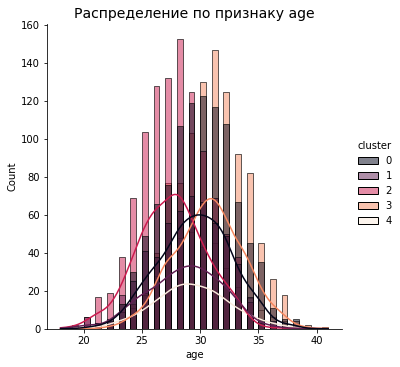

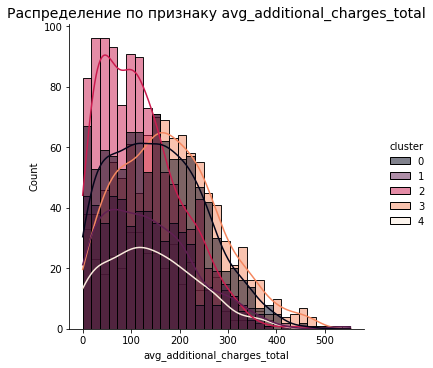

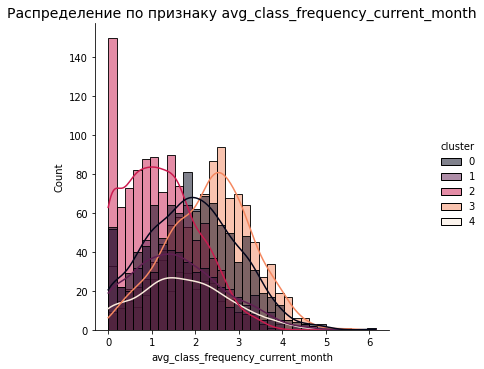

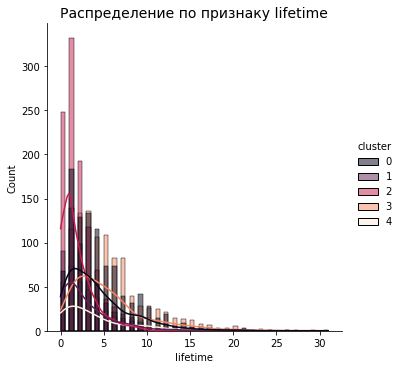

In [25]:
for col in gym[['age', 'avg_additional_charges_total', 'avg_class_frequency_current_month', 'lifetime']].columns:
    sns.color_palette("hls", 8)
    plot = sns.displot(x=gym[col],hue= gym['cluster'],kde=True,palette ="rocket" )
    plt.title('Распределение по признаку {}'.format(col),fontsize=14)
    plt.show()

* У распределений по признаку gender в различных кластерах нет значимых отличий
* Среди распределений по признаку avg_additional_charges_total выделяется 2 кластер с наибольшими пиками в области меньших значений
* Среди распределений по признаку avg_class_frequency_current_month также выделяется 2 кластер, распределение смещено в сторону меньших значений с наибольшим пиком в области 0
* Среди распределений по признаку lifetime выделяются 1 и 2 кластер, более высокими пиками в области меньших значений

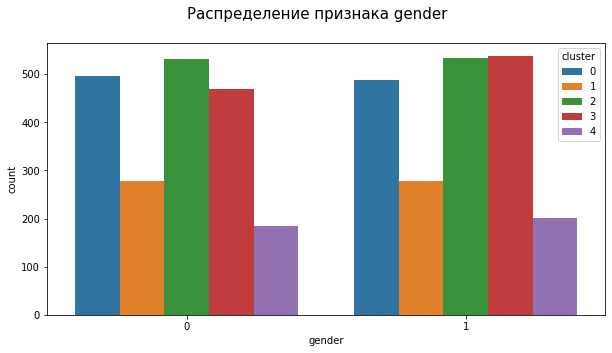

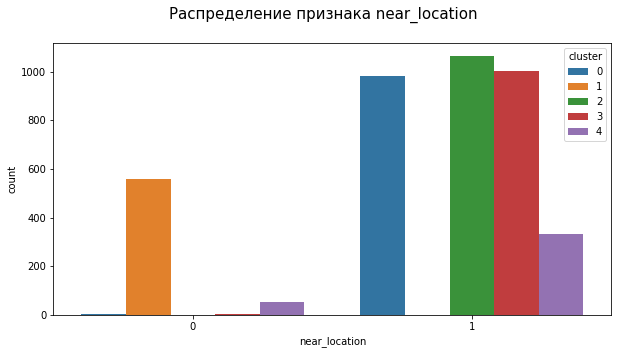

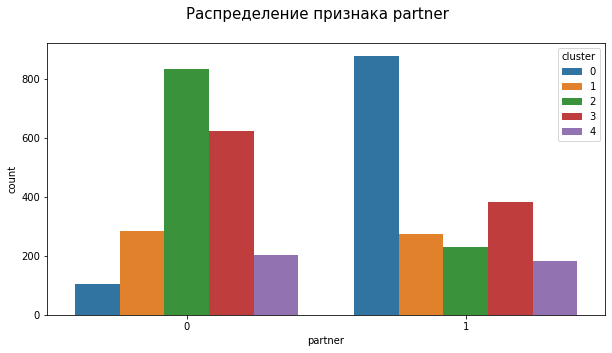

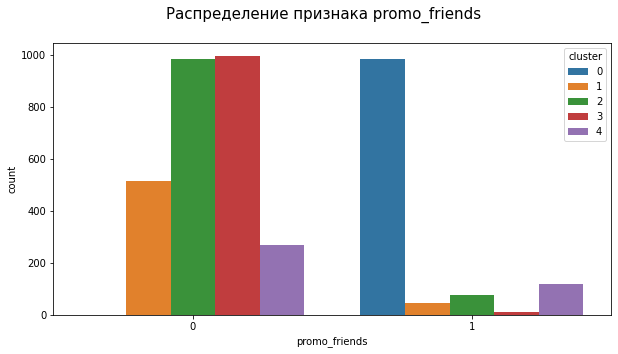

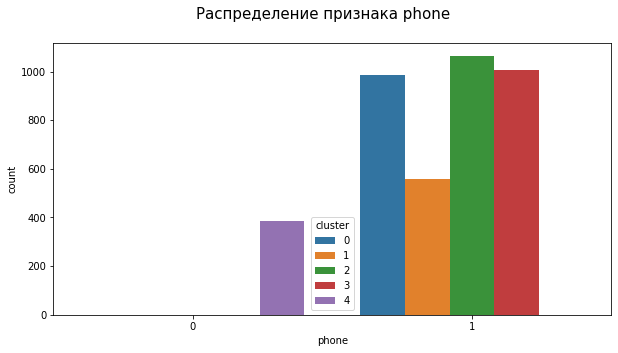

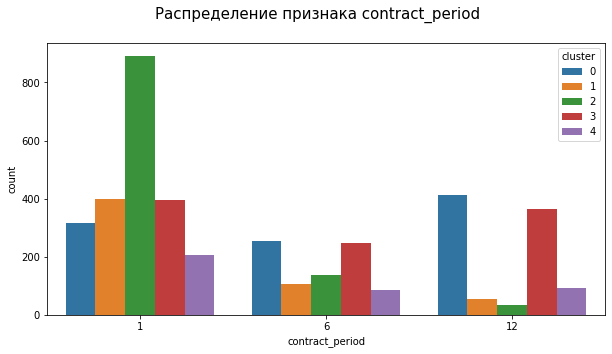

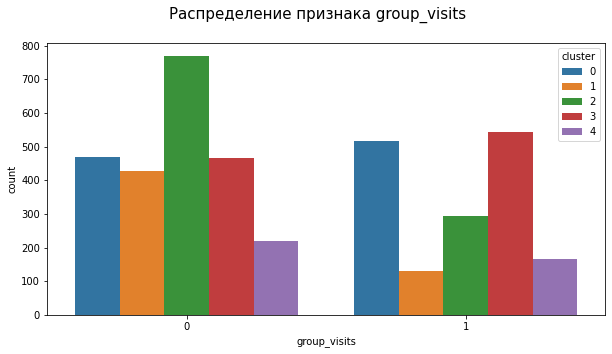

In [26]:
for col in gym[ ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']].columns:
    fig = plt.figure(figsize = (10,5))
    fig.suptitle('Распределение признака {}'.format(col),fontsize=15)
    sns.countplot(x=col, hue='cluster', data=gym)
    plt.show()

* Распределение по признаку пола одинаково в обеих группах
* Большая часть клиентов 0,2,3 и 4 кластеров живет или работает рядом с клубом, все клиенты 1 кластера не живут и не работают рядом с клубом
* Большая часть клиентов 0 кластера сотрудники компании-партнёра клуба, большая часть клиентов 2 и 3 кластеров не сотрудники компании-партнёра клуба, в 1 и 4 кластерах их соотношение примерно одинаково
* Все клиенты 0 кластера пришли по программе promo_friends, большая часть клиентов других кластеров пришла не по программе promo_friends 
* У всех клиентов 4 кластера не указан номер телефона, у всех клиентов других кластеров телефон указан
* Большая часть клиентов 1,2 и 4 классов не посещают групповые занятия, большая часть клиентов 0 и 3 кластеров посещают групповые занятия
* Большая часть клиентов 1,2 и 4 кластеров имеют абонемент на 1 месяц, большая часть клиентов 0 и 3 кластеров имеют годовой абонемент.

Таким образом согласно доле оттока для каждого кластера к оттоку наиболее склонны клиенты 2 (0.56) и 1(0.4) кластера, наиболее "надежные" клиенты 3 класса (0.01).

<a id = '6'> </a>

## Вывод

На основании данных анкеты, а также журнала посещений, покупок и информация о текущем статусе абонемента клиента клиентов можно разделить на 5 кластеров. 

К оттоку наиболее склонны клиенты 2 (0.56) и 1(0.4) кластера, наиболее "надежные" клиенты 3 класса (0.01). В представленных для анализа данных именно клиенты, относящиеся ко 2 кластеру являются самой многочиесленнйо группой, поэтому наибольшее внимание стоит уделить им.

Особенность клиентов 2 класса - большая часть не посещает групповые занятия и имеют абонемент на 1 месяц, имеют низкий лайфтайм и низкую частоту посещения клуба в последний месяц

Особенность клиентов 1 кластера - не живут и не работают рядом с клубом, большая часть не посещает групповые занятия и имеют абонемент на 1 месяц, имеют низкий лайфтайм

Меры по снижению оттока:
1. На основании имеющихся о клиентах даннных определять их кластер, выделять группы "ненадежных" клиентов
2. Среди клиентов кластеров, склонных к оттоку :
- при оформлении абонемента на 1 месяц активно указывать на выгодность абоненментов на 6 и 12 месяцев, возможно ввести промежуточный абонемент на 3 месяца. 
- при снижении частоты посещения ниже определенного значения рассылка уведомлений клиентам, что их абонемент ещё действует, ненавязчивое приглашение посетить клуб до истечения абонемента
3. Для всех клиентов:
- бесплатные пробные групповые занятия для привелечения к этой группе занятий, для клиентов уже посещающих групповые занятия ввведение дополнительных скидок или бонусов за регулярное посещение.